In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
df1 = pd.read_csv("insurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [130]:
df1.shape

(1338, 7)

In [131]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---
---
---

#**converting categorical data into numeric data**



#male=1    female=0

In [132]:
df2=df1.replace(to_replace=['male','female'],value=[1,0])
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


#yes=1 & no=0

In [133]:
df3=df2.replace(to_replace=["yes",'no'],value=[1,0])
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


#northeast=1 northwest=2 southeast=3 southwest=4


In [134]:
df4=df3.replace(to_replace=['northeast','northwest','southeast','southwest'], value=[1,2,3,4])
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [135]:
df4['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

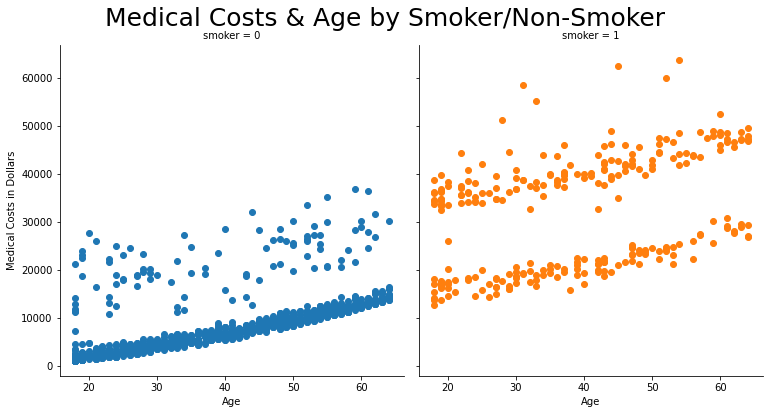

In [136]:
a = sns.FacetGrid(df4, col='smoker',hue='smoker',height =6,aspect= 0.9)                  
a.map(plt.scatter, 'age', 'charges')
a.set_axis_labels('Age', 'Medical Costs in Dollars')
plt.suptitle('Medical Costs & Age by Smoker/Non-Smoker', fontsize = 25);plt.tight_layout(rect=[0, 0.03, 1, 0.95])

sex       0    1
smoker          
0       547  517
1       115  159


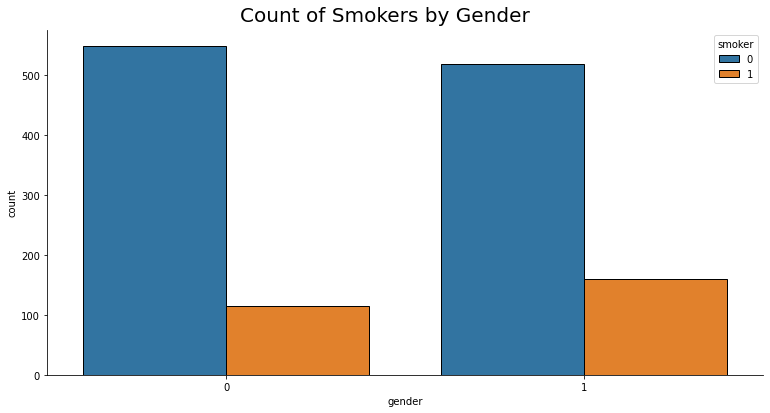

In [137]:
sns.catplot(x ='sex',hue='smoker', data=df4, kind="count",height=6, aspect=1.8,legend_out=False, edgecolor="black")
plt.suptitle('Count of Smokers by Gender', fontsize = 20)
plt.xlabel('gender')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
print(pd.crosstab(df4['smoker'],df4['sex']))

#**X and Y**

In [138]:
# features
x = df4[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
y = df4['charges']

# Splitting X and Y for MLR and RFR 


In [139]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#**MLR**

In [140]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test,y_test)

0.7911113876316934

In [141]:

predictions = regressor.predict(x_test)


In [142]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predictions))

33311355.281859953


In [143]:
regressor.score(x_test, predictions)

1.0

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', r2_score(y_test, y_test_pred))


Mean Absolute Error: 5683.801384884162
Mean Squared Error: 73955364.19022588
Root Mean Squared Error: 8599.730471952356
R2 Score: 0.5362412224848252


In [146]:
##Predicting the charges
y_test_pred = regressor.predict(x_test)
##Comparing the actual output values with the predicted values
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfp

,Actual,Predicted
578,9724.53000,11051.549098
610,8547.69130,9821.281107
569,45702.02235,37867.572209
1034,12950.07120,16125.705792
198,9644.25250,6920.271325
...,...,...
1261,3277.16100,7163.959140
494,17942.10600,26454.585591
97,10226.28420,14277.024077
418,14418.28040,17354.845390




---


---



---



---



---




---



---



---



---

# RFR

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error


In [148]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3524236.553, MSE test data: 22939116.567
R2 train data: 0.975, R2 test data: 0.856


In [149]:
predictions2 = forest.predict(x_test)


In [150]:
forest.score(x_test,y_test)


0.8561535491980508

In [151]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', r2_score(y_test, y_test_pred))


Mean Absolute Error: 4013.692985781194
Mean Squared Error: 33311355.281859953
Root Mean Squared Error: 5771.59902296235
R2 Score: 0.7911113876316934


In [152]:
##Predicting the charges
y_test_pred = forest.predict(x_test)
##Comparing the actual output values with the predicted values
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfp.head(10)

,Actual,Predicted
578,9724.53000,10876.842461
610,8547.69130,10150.012087
569,45702.02235,45002.227300
1034,12950.07120,13267.053859
198,9644.25250,10361.916933
981,4500.33925,10981.636903
31,2198.18985,2275.657625
1256,11436.73815,11845.273205
1219,7537.16390,7545.767853
1320,5425.02335,6826.454318




---

---



---



---



---




---



---




---


#**PCA**



In [153]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x)

In [154]:
from sklearn.decomposition import PCA

In [155]:
pca = PCA(n_components=2)


In [156]:
x = pca.fit_transform(x)
p_var = pca.explained_variance_ratio_
print(p_var)

[0.20060309 0.1813664 ]


In [157]:
print(x)


[[ 0.4138055   1.11914688]
 [-0.12275981  0.8221422 ]
 [-0.62442365  0.6374776 ]
 ...
 [-0.01196397 -0.53097399]
 [ 0.65020071 -0.58750209]
 [ 0.10392973  0.09896763]]


In [158]:
x.shape

(1338, 2)

#**MLR with PCA**

In [159]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [160]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test,y_test)

0.3011259438301015

In [161]:

predictions4 = regressor.predict(x_test)


In [162]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predictions))

33311355.281859953


In [163]:
regressor.score(x_test, predictions)

0.396061308605289

In [164]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', r2_score(y_test, y_test_pred))


Mean Absolute Error: 2873.8997174059064
Mean Squared Error: 22939116.567300905
Root Mean Squared Error: 4789.479780445983
R2 Score: 0.8561535491980508


In [165]:
##Predicting the charges
y_test_pred = regressor.predict(x_test)
##Comparing the actual output values with the predicted values
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfp.head()

,Actual,Predicted
578,9724.53000,16729.058194
610,8547.69130,7616.815536
569,45702.02235,26382.326875
1034,12950.07120,15418.091300
198,9644.25250,1925.735904


#**RFR with PCA**

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error


In [167]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 12108111.643, MSE test data: 73955364.190
R2 train data: 0.914, R2 test data: 0.536


In [168]:
predictions2 = forest.predict(x_test)


In [169]:
forest.score(x_test,y_test)


0.5362412224848251

In [170]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', r2_score(y_test, y_test_pred))


Mean Absolute Error: 8461.446753963812
Mean Squared Error: 111449071.91638869
Root Mean Squared Error: 10556.944250889492
R2 Score: 0.3011259438301015


In [171]:
##Predicting the charges
y_test_pred = forest.predict(x_test)
##Comparing the actual output values with the predicted values
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfp.head()

,Actual,Predicted
578,9724.53000,11836.093422
610,8547.69130,9503.839088
569,45702.02235,40801.350662
1034,12950.07120,13787.028532
198,9644.25250,17319.038510
